### Tests - demo of functionality

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'H2 Model - Input sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### TEST01. show how 'reinvestment' works around the limit case (reinvestment when no  sufficient years are left)

In [3]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
display(foundation_data)

issue detected


{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 2691000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 1,
 'share_of_investments': [1, 0, 0],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': [],
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [4]:
# create Foundation object
Foundation = Object(**foundation_data)

In [5]:
# specify construction_duration, share_of_investments, and economic_lifetime for the purpose of the test
Foundation.construction_duration=3
Foundation.share_of_investments=[0.4, 0.3, 0.3]
Foundation.economic_lifetime=25

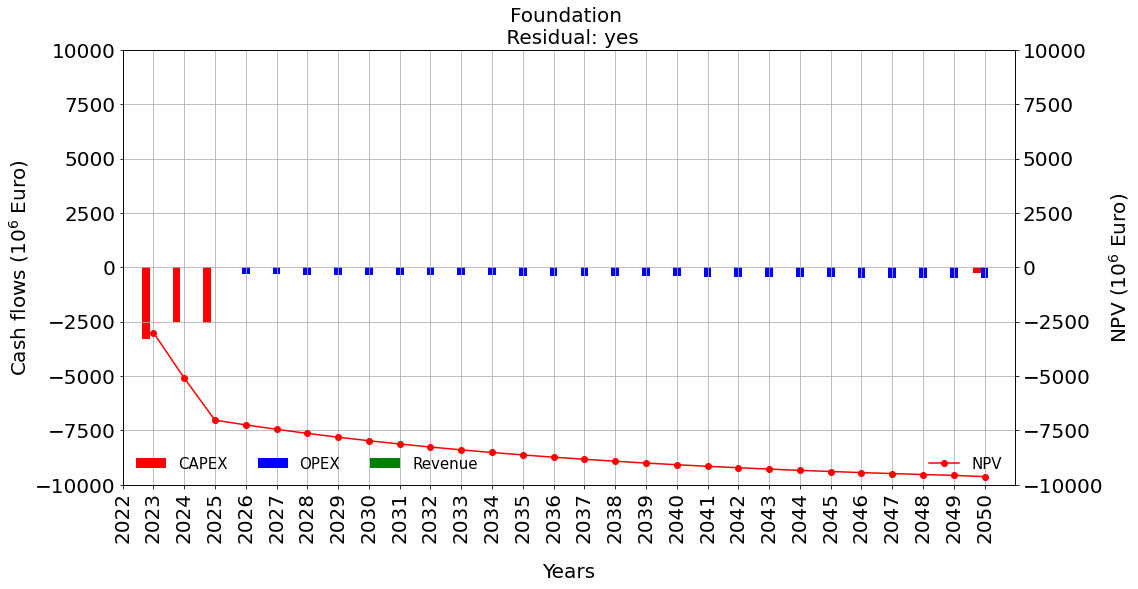

In [6]:
# case: reinvestment needed in 2048, 2050 does NOT allow the investment to pay off at least 1 year
Foundation.generate_cashflows(startyear=2023, lifecycle=27, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )

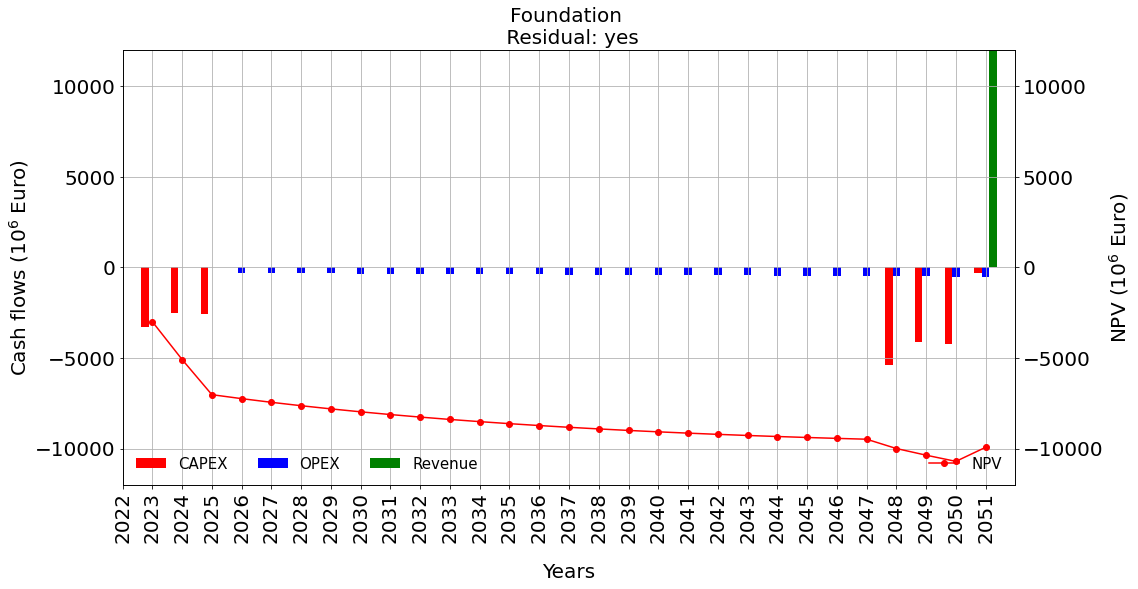

In [7]:
# case: reinvestment needed in 2048, 2051 allows for the CAPEX spending, next year decommissioning and max residual value
Foundation.generate_cashflows(startyear=2023, lifecycle=28, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )

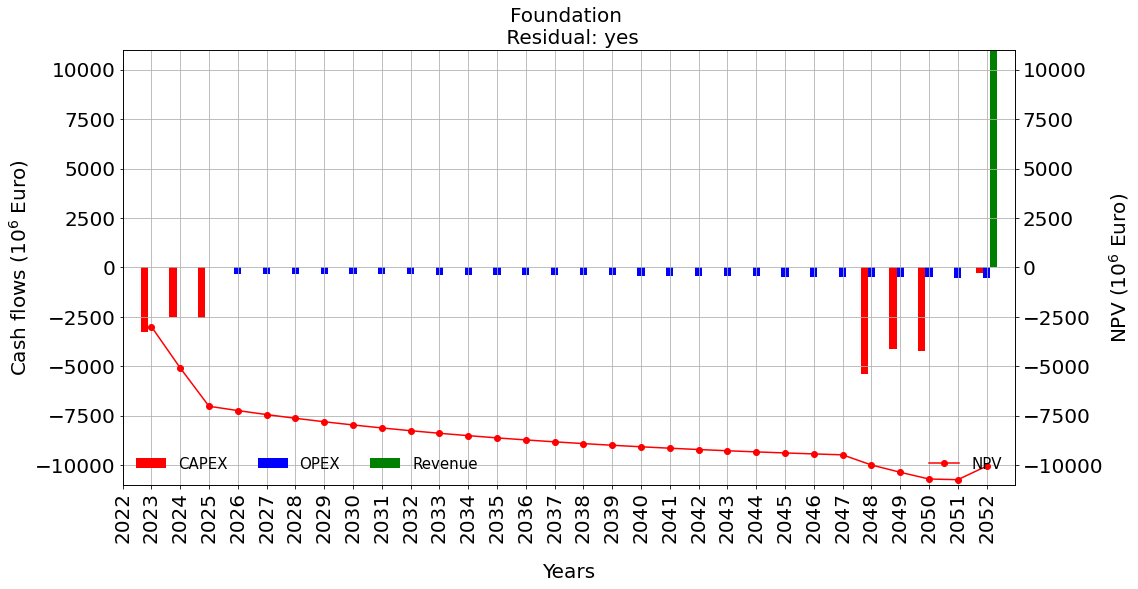

In [8]:
Foundation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )